# Finance notebooks #
## Some basics: prices and returns ##

Let's start with some basics in financial markets analysis! We'll use **python** (https://www.python.org/) as programming language, starting with **pandas** (http://pandas.pydata.org/), a well-renowned module for data manipulation and analysis. First of all, let's import the modules we need.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Defines the chart color scheme using Tableu's Tableau10 
plt.style.use('https://gist.githubusercontent.com/mbonix/8478091db6a2e6836341c2bb3f55b9fc/raw/7155235ed03e235c38b66c160d402192ad4d94d9/tableau10.mplstyle')

%matplotlib inline

Then, let's choose a bunch of stocks to analyze. They are: **Apple** (AAPL), **Alphabet** (former Google, GOOGL), **Microsoft** (MSFT), **McDonald's** (MCD), **Coca-Cola** (KO). Three technology companies and two food & beverage stocks. 

In [18]:
# List of stocks tickers
STOCKS = ['NASDAQ:AAPL', 'NASDAQ:GOOGL', 'NASDAQ:MSFT', 'NYSE:MCD', 'NYSE:KO']

# Analysis period
START = '12-30-2006'
END = '12-31-2016'

Now, let's download stock data from Yahoo!Finance, using **pandas-datareader** module.

In [23]:
data = web.DataReader(STOCKS, 'google', pd.to_datetime(START), pd.to_datetime(END))

We'll work only on **Close** prices, so let's discard the other data.

In [24]:
prices = data.loc['Close', :, :]
prices.tail(10)

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Date,,,,,
2016-12-16,115.97,809.84,62.30,41.74,123.24
2016-12-19,116.64,812.50,63.62,41.67,122.99
2016-12-20,116.95,815.20,63.54,41.66,123.33
2016-12-21,117.06,812.20,63.54,41.57,123.18
2016-12-22,116.29,809.68,63.55,41.55,123.72
2016-12-23,116.52,807.80,63.24,41.60,123.14
2016-12-27,117.26,809.93,63.28,41.61,123.07
2016-12-28,116.76,804.57,62.99,41.39,122.68
2016-12-29,116.73,802.88,62.90,41.60,122.79


Now, let's plot prices.

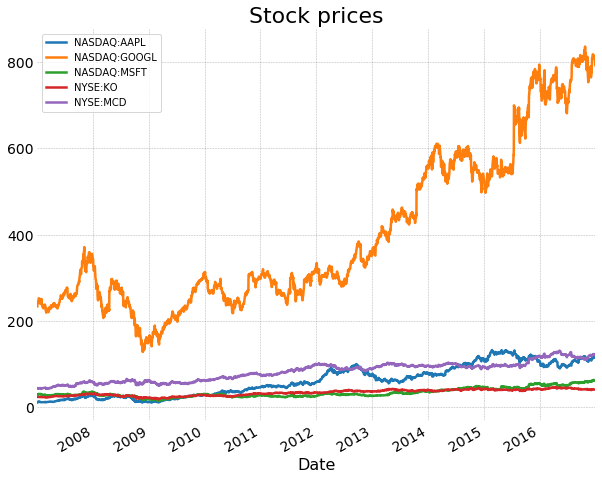

In [25]:
prices.plot(figsize=(10, 8), title='Stock prices');

**Alphabet**, or Google, seems to be the winner in these 10 years. But comparison of stocks is difficult because of different ranges of prices. Let's try to normalize them, rebasing to 100.

In [26]:
norm_prices = 100 * prices / prices.iloc[0, :]
norm_prices.head(10)

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Date,,,,,
2007-01-03,100.000000,100.000000,100.000000,100.000000,100.000000
2007-01-04,102.255639,103.349998,99.832552,100.041169,99.247778
2007-01-05,101.503759,104.191770,99.263228,99.341293,99.247778
2007-01-08,102.005013,103.418365,100.234427,99.958831,99.635286
2007-01-09,110.442774,103.828569,100.334896,100.041169,99.817643
2007-01-10,115.789474,104.674614,99.330208,100.205846,100.888990
2007-01-11,114.369256,106.870914,102.813128,100.329354,101.458856
2007-01-12,112.949039,107.998974,104.521098,99.958831,100.797812
2007-01-16,115.873016,107.845148,104.353650,99.835323,101.595623


Now, a plot of rebased prices.

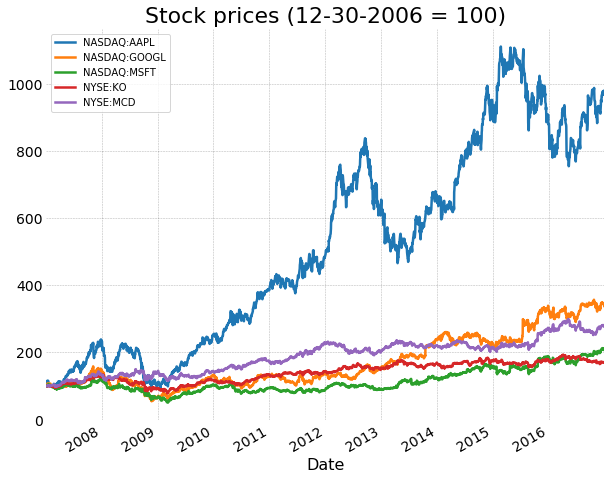

In [32]:
norm_prices.plot(figsize=(10, 8), title='Stock prices ({} = 100)'.format(START));

Now, it's clear that **Apple** and not Alphabet was the winner. Which was its return over the period, anyway? Let's calculate it! 

In [28]:
absolute_returns = (norm_prices.iloc[-1, :]).to_frame().T
absolute_returns.index = ['Absolute Return (%)']
absolute_returns

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Absolute Return (%),967.585631,338.610435,208.104488,170.687526,277.45612


An astonishing **967.59%**! Or a **26.72%** compound annual return, if you prefer.

In [29]:
compound_returns = 100 * ((1 + absolute_returns / 100) ** 0.1 - 1)
compound_returns.index = ['Compound Annual Return (%)']
compound_returns

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Compound Annual Return (%),26.718573,15.933219,11.910234,10.470628,14.205402


Now, let's resample data into yearly percent returns.

In [30]:
yearly_returns = prices.resample('A').last().pct_change()
yearly_returns

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Date,,,,,
2007-12-31,NaN,NaN,NaN,NaN,NaN
2008-12-31,-0.569258,-0.555087,-0.453933,-0.262060,0.055678
2009-12-31,1.469237,1.015197,0.567901,0.258834,0.004020
2010-12-31,0.530897,-0.041959,-0.084318,0.153684,0.229340
2011-12-31,0.255642,0.087426,-0.069867,0.063869,0.307061
2012-12-31,0.313861,0.095184,0.028891,0.036306,-0.120801
2013-12-31,0.054328,0.584341,0.400599,0.139586,0.099989
2014-12-31,0.377168,-0.053947,0.241647,0.022029,-0.034319
2015-12-31,-0.046385,0.466118,0.194403,0.017527,0.260832


Then, let's plot the returns.

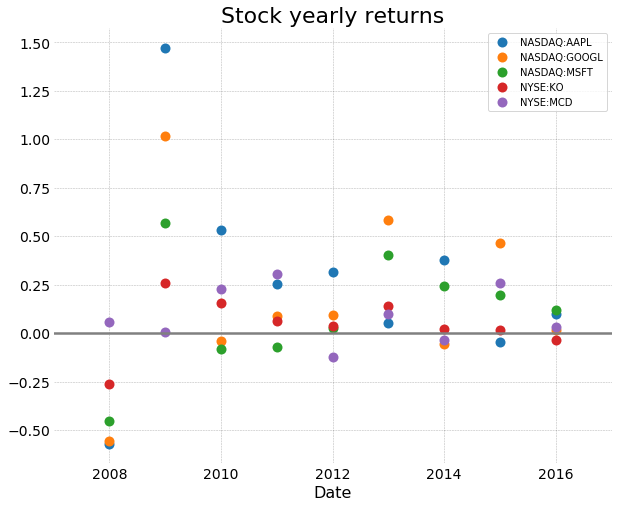

In [49]:
ax = yearly_returns.plot(figsize=(10, 8), title='Stock yearly returns', ls='', marker='o');
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 1)
ax.axhline(0, color='gray');

And let's see how returns averaged in the period. 

In [54]:
yearly_avgs = yearly_returns.mean().to_frame().T
yearly_avgs.index = ['Average Yearly Return (%)']
yearly_avgs

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Average Yearly Return (%),0.276201,0.179537,0.105041,0.043873,0.092456


Then we can compute yearly logarithmic returns over the period.

In [55]:
import numpy as np

yearly_log_returns = prices.resample('A').last().apply(np.log).diff()
yearly_log_returns

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Date,,,,,
2007-12-31,NaN,NaN,NaN,NaN,NaN
2008-12-31,-0.842246,-0.809876,-0.605013,-0.303893,0.054183
2009-12-31,0.903909,0.700717,0.449738,0.230186,0.004012
2010-12-31,0.425854,-0.042865,-0.088086,0.142960,0.206478
2011-12-31,0.227647,0.083813,-0.072428,0.061912,0.267781
2012-12-31,0.272970,0.090922,0.028481,0.035663,-0.128744
2013-12-31,0.052903,0.460168,0.336900,0.130665,0.095300
2014-12-31,0.320029,-0.055457,0.216438,0.021789,-0.034922
2015-12-31,-0.047495,0.382618,0.177646,0.017375,0.231772


Let's also plot log returns. 

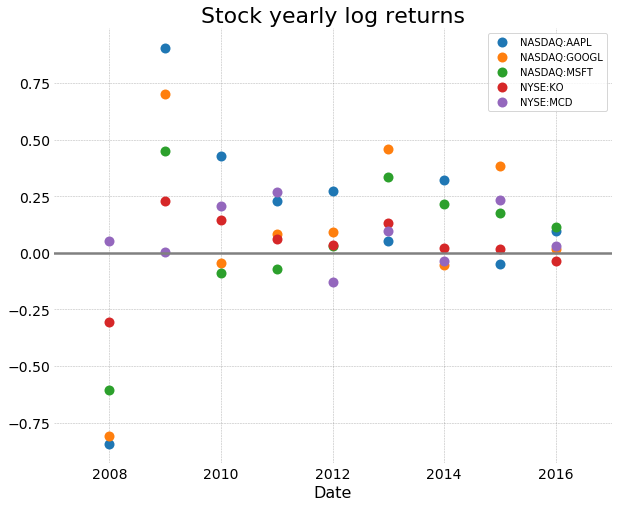

In [56]:
ax = yearly_log_returns.plot(figsize=(10, 8), title='Stock yearly log returns', ls='', marker='o');
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 1)
ax.axhline(0, color='gray');

Again, let's compute averages. Quite different from percent returns, aren't they?

In [57]:
yearly_log_avgs = yearly_log_returns.mean().to_frame().T
yearly_log_avgs.index = ['Average Yearly Log Return (%)']
yearly_log_avgs

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Average Yearly Log Return (%),0.156575,0.092048,0.061894,0.033458,0.080635


We always can transform percent returns into log returns:

In [58]:
(1 + yearly_returns).apply(np.log)

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Date,,,,,
2007-12-31,NaN,NaN,NaN,NaN,NaN
2008-12-31,-0.842246,-0.809876,-0.605013,-0.303893,0.054183
2009-12-31,0.903909,0.700717,0.449738,0.230186,0.004012
2010-12-31,0.425854,-0.042865,-0.088086,0.142960,0.206478
2011-12-31,0.227647,0.083813,-0.072428,0.061912,0.267781
2012-12-31,0.272970,0.090922,0.028481,0.035663,-0.128744
2013-12-31,0.052903,0.460168,0.336900,0.130665,0.095300
2014-12-31,0.320029,-0.055457,0.216438,0.021789,-0.034922
2015-12-31,-0.047495,0.382618,0.177646,0.017375,0.231772


And vice versa:

In [59]:
(yearly_log_returns).apply(np.exp) - 1

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Date,,,,,
2007-12-31,NaN,NaN,NaN,NaN,NaN
2008-12-31,-0.569258,-0.555087,-0.453933,-0.262060,0.055678
2009-12-31,1.469237,1.015197,0.567901,0.258834,0.004020
2010-12-31,0.530897,-0.041959,-0.084318,0.153684,0.229340
2011-12-31,0.255642,0.087426,-0.069867,0.063869,0.307061
2012-12-31,0.313861,0.095184,0.028891,0.036306,-0.120801
2013-12-31,0.054328,0.584341,0.400599,0.139586,0.099989
2014-12-31,0.377168,-0.053947,0.241647,0.022029,-0.034319
2015-12-31,-0.046385,0.466118,0.194403,0.017527,0.260832


If we plot daily returns, we can clearly see a different scale over time and across stocks. Let's try with **Apple** and **McDonald's**.

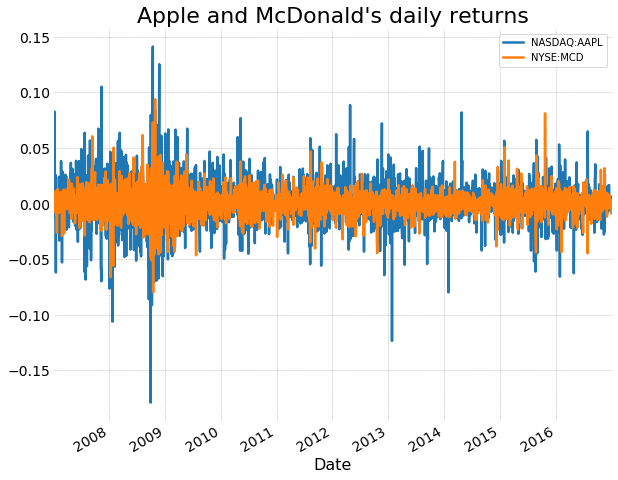

In [64]:
prices.loc[:, ['NASDAQ:AAPL', 'NYSE:MCD']].pct_change().plot(figsize=(10, 8), title="Apple and McDonald's daily returns")

That leads us to a new topic: volatility, i.e. variability of returns. But this is a topic which deserves a new anaysis. To be continued...